Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import numpy as np

### Q1. Load the dataset 

In [2]:
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.describe()    ## Numerical features may need scaling

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

<AxesSubplot:xlabel='status', ylabel='count'>

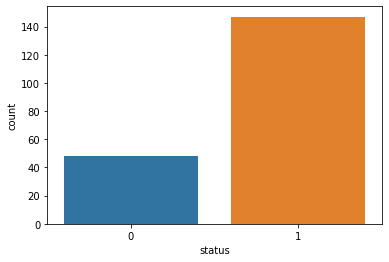

In [8]:
sns.countplot(df.status)   ## People with Parkinson's disease have more share.

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [10]:
df.isnull().sum()  ##no null values.

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

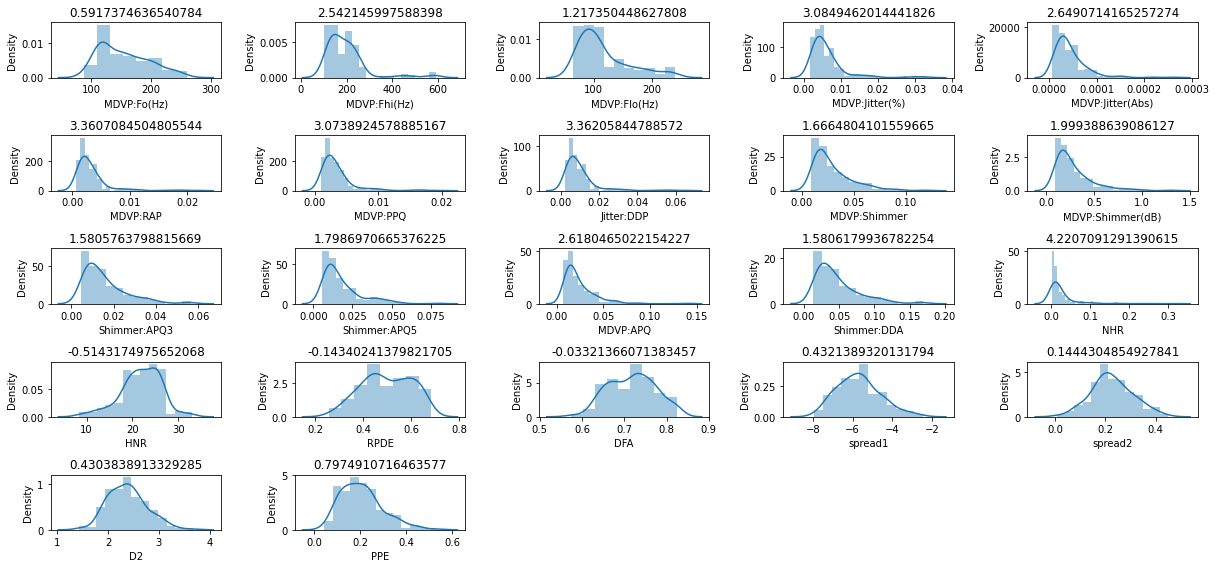

In [17]:
a = 5
b = 5
c = 1
plt.figure(figsize = [17,8])
for i in df.drop(['name','status'], axis = 1).columns :
    plt.subplot(a,b,c)
    plt.title(df[i].skew())
    sns.distplot(df[i])
    c+=1
    
plt.tight_layout()
plt.show()

## Scaling of Numerical data is essential.

In [18]:
num_feat = df.drop(['name','status'], axis = 1)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(num_feat)

x_sc = pd.DataFrame(x,columns = num_feat.columns)

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

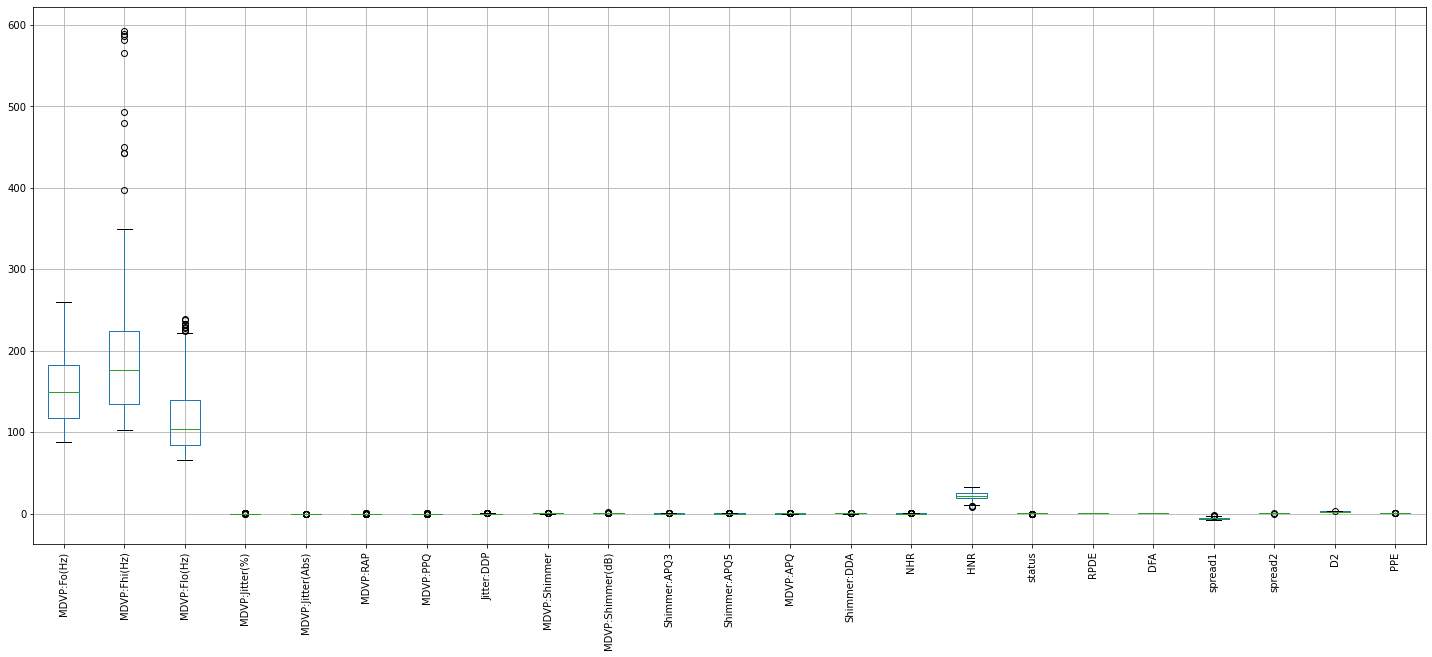

In [21]:
plt.figure(figsize = [20,8])
df.boxplot()
plt.tight_layout()
plt.xticks(rotation = 90)  
plt.show()                               ## There are outliers - Max in MDVP: Fiz(Hz)



In [22]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

df_wtol = df[~((df<q1-1.5*IQR)|(df>q3+1.5*IQR)).any(axis = 1)]
df_wtol.shape   ## 82 data points lost. ## There is a lot of loss of data in outlier treatment, earlier done scaling seems rational.

(114, 24)

### Q7. Are there any strong correlations among the independent features?

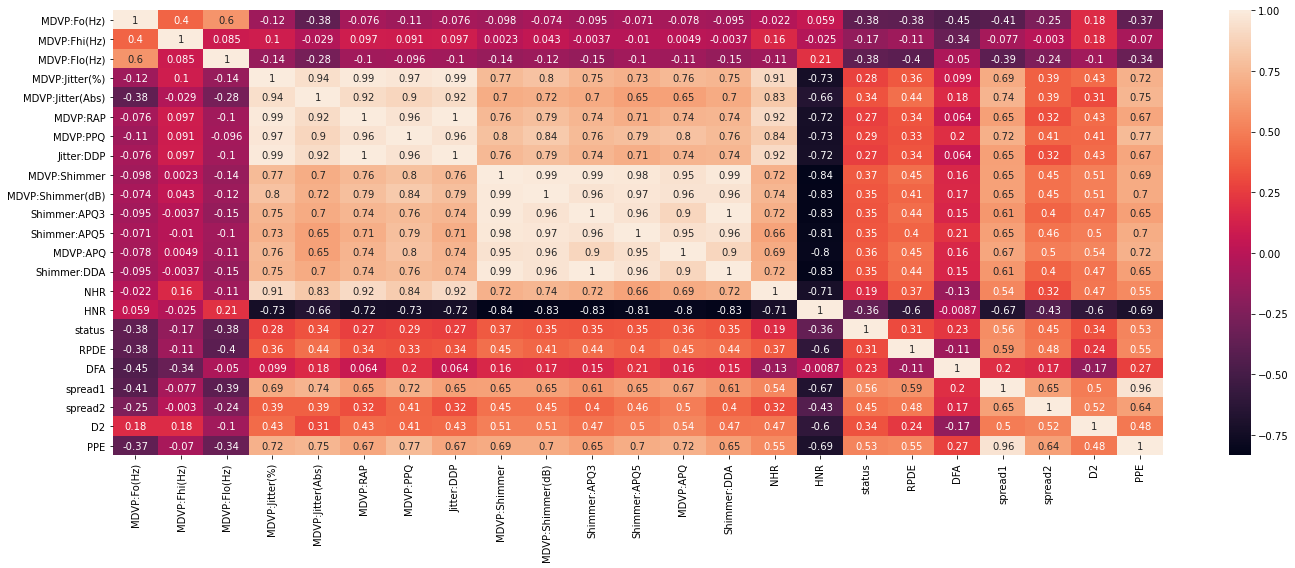

In [24]:
plt.figure(figsize = [20,8])

sns.heatmap(df.corr(), annot = True)
plt.tight_layout()
plt.show()  ## Multicollinearity issue.

### Q8. Split dataset into training & test dataset  

In [25]:
cat_feat = df.name

dummy = pd.get_dummies(cat_feat, drop_first = True)

In [26]:
feat = pd.concat([x_sc,dummy], axis = 1)

In [28]:
target = df.status

In [29]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(feat,target,test_size = 0.30, random_state = 10)

### Q9. Create a default decision tree model using criterion = Entropy 

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(Xtrain,ytrain) ##base model

DecisionTreeClassifier(criterion='entropy')

In [31]:
pred_dt1 = dt.predict(Xtest)

In [32]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score

In [33]:
from matplotlib.colors import ListedColormap

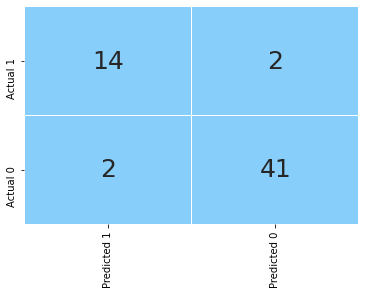

In [34]:
cm = confusion_matrix(ytest,pred_dt1)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

In [35]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(Xtest)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

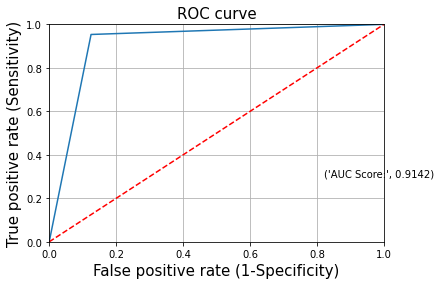

In [36]:
plot_roc(dt)

In [37]:
print('Accuracy : ', accuracy_score(ytest,pred_dt1))

Accuracy :  0.9322033898305084


### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [38]:
from sklearn.model_selection import validation_curve,GridSearchCV

In [42]:
from sklearn.tree import DecisionTreeClassifier

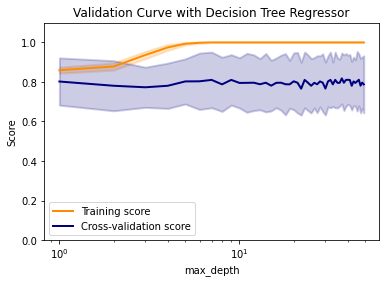

In [43]:
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), Xtrain, ytrain, param_name="max_depth", param_range=param_range,n_jobs=1,cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

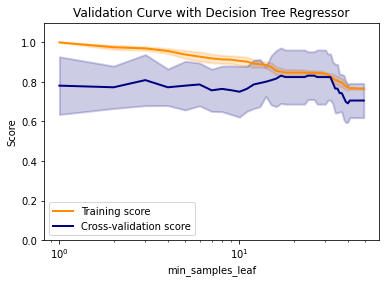

In [46]:
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), Xtrain, ytrain, param_name="min_samples_leaf", param_range=param_range,n_jobs=1,cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Regressor")
plt.xlabel("min_samples_leaf")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [48]:
tuned_params = [{'max_depth':np.arange(1,10),
                'min_samples_leaf':np.arange(1,5)}]

grid = GridSearchCV(estimator =DecisionTreeClassifier(criterion='entropy'),param_grid=tuned_params,cv = 10)

grid.fit(Xtrain,ytrain)

grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 4}

In [52]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=4)

dt2.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4)

In [53]:
pred_dt2 = dt2.predict(Xtest)

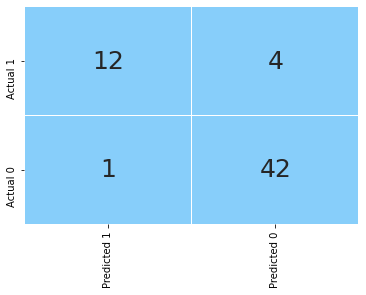

In [54]:
cm = confusion_matrix(ytest,pred_dt2)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()  ##FN are reduced.

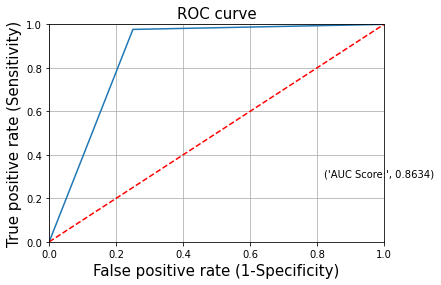

In [55]:
plot_roc(dt2)  ## needs more parameter tuning.

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
tuned_params = [{'n_estimators':np.arange(1,50)}]

grid = GridSearchCV(estimator =RandomForestClassifier(criterion='gini'),param_grid=tuned_params,cv = 10)

grid.fit(Xtrain,ytrain)

grid.best_params_

{'n_estimators': 37}

In [58]:
rf_tuned = RandomForestClassifier(criterion = 'gini', n_estimators = 37)

rf_tuned.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=37)

In [59]:
pred_rf_tuned = rf_tuned.predict(Xtest)

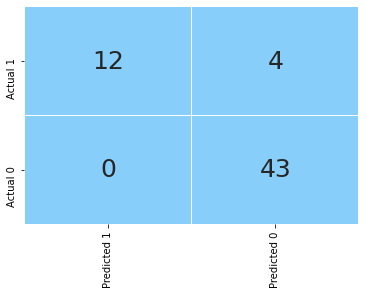

In [60]:
cm = confusion_matrix(ytest,pred_rf_tuned)

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

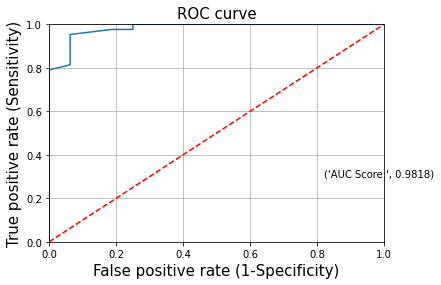

In [61]:
plot_roc(rf_tuned)

In [62]:
## Best possible model with hyper-parameter tuning.